In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [32]:
def stdev(array, mean):
  N = len(array)
  sq = 0
  for val in array:
    sq += ((val-mean)**2)
  return(math.sqrt(sq/(N-1)))

def avg(array):
  N = len(array)
  tot = 0
  for val in array:
    tot += val
  return(tot/N)


In [ ]:
chan_2 = np.loadtxt("/content/drive/My Drive/charge_preamp_data/BF862_10us_SigOn_acq1.csv",skiprows=10, delimiter=",",usecols=1)
time = np.loadtxt("/content/drive/My Drive/charge_preamp_data/BF862_10us_SigOn_acq1.csv",skiprows=10, delimiter=",",usecols=0)

test of concept

Text(0.5, 1.0, 'BF862, 10us')

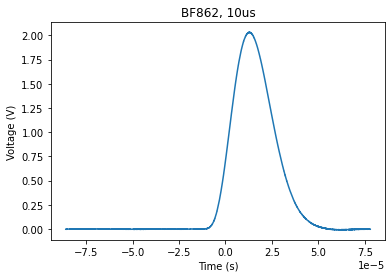

In [ ]:
plt.plot(time, chan_2)
plt.ylabel("Voltage (V)")
plt.xlabel("Time (s)")
plt.title("BF862, 10us")

In [ ]:
max = 0
end = len(chan_2)

for index in range(0, end):
  if abs(chan_2[index]) > max:
    max = abs(chan_2[index])

print(max)

2.0332763439370307


real code

In [ ]:
for val in range(1, 3):
  temp_file = np.loadtxt("/content/drive/My Drive/charge_preamp_data/BF862/10 us/BF862_10us_SigOn_acq%d.csv" % (val),skiprows=10, delimiter=",",usecols=1)
  print(temp_file[0])

-0.0023852039924410207
0.0009856546727839977


(array([  1.,   8.,  24., 119., 224., 283., 241.,  74.,  21.,   5.]),
 array([2.00024193, 2.00573643, 2.01123093, 2.01672543, 2.02221993,
        2.02771443, 2.03320893, 2.03870343, 2.04419793, 2.04969243,
        2.05518693]),
 <a list of 10 Patch objects>)

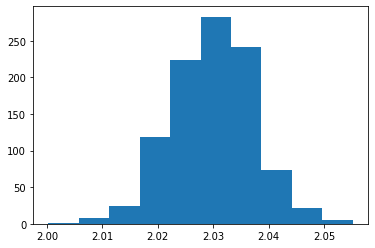

In [7]:
# plotting gaussians for each shaping time

for val in range(1, 1001):
  temp_file = np.loadtxt("/content/drive/My Drive/charge_preamp_data/BF862/0.5 us/BF862_0.5us_SigOn_acq%d.csv" % (val),skiprows=10, delimiter=",",usecols=1)
  temp_max = 0
  for elem in temp_file:
    if elem > temp_max:
      temp_max = elem
  max_array.append(temp_max)

plt.hist(max_array)

In [12]:
def Gaussian(mean, std, x):
  gauss = (1/(std * np.sqrt(2*np.pi)))*np.exp((-1/2)*((x-mean)/std)**2)
  return gauss

In [46]:
max_array = []

for jfet in ["CPH3910", "BF862", "2SK932", "2SK3557"]:
  for val in range(1, 1001):
    temp_file = np.loadtxt("/content/drive/My Drive/charge_preamp_data/%s/0.5 us/%s_0.5us_SigOn_acq%d.csv" % (jfet, jfet, val),skiprows=10, delimiter=",",usecols=1)
    temp_max = 0
    for elem in temp_file:
      if elem > temp_max:
        temp_max = elem
    max_array.append(temp_max)

#plt.hist(max_array[0, 1001], marker="o")
#plt.hist(max_array
#plt.title("0.5 us shaping time, CPH3910")
#plt.ylabel("Frequency")
#plt.xlabel("Peak values")

In [21]:
max_array = []

for jfet in ["CPH3910", "BF862", "2SK932", "2SK3557"]:
  for val in range(1, 1001):
    temp_file = np.loadtxt("/content/drive/My Drive/charge_preamp_data/%s/10 us/%s_10us_SigOn_acq%d.csv" % (jfet, jfet, val),skiprows=10, delimiter=",",usecols=1)
    temp_max = 0
    for elem in temp_file:
      if elem > temp_max:
        temp_max = elem
    max_array.append(temp_max)

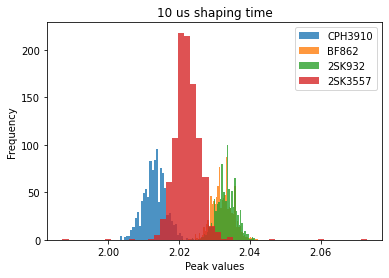

0.003220, 0.002934, 0.002765, 0.004159


In [22]:
plt.hist(max_array[0:1001], alpha=0.8, label="CPH3910", bins=50)
plt.hist(max_array[1001:2001], alpha=0.8, label="BF862", bins=50)
plt.hist(max_array[2001:3001], alpha=0.8, label="2SK932", bins=50)
plt.hist(max_array[3001:4001], alpha=0.8, label="2SK3557", bins=50)
plt.title("10 us shaping time")
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Peak values")
plt.show()
print("%f, %f, %f, %f" % (stdev(max_array[0:1001], avg(max_array[0:1001])), stdev(max_array[1001:2001], avg(max_array[1001:2001])), stdev(max_array[2001:3001], avg(max_array[2001:3001])), stdev(max_array[3001:4001], avg(max_array[3001:4001]))))

In [24]:
with open('/content/drive/My Drive/10 us.txt', 'w') as f:
    np.savetxt(f, max_array)

4000


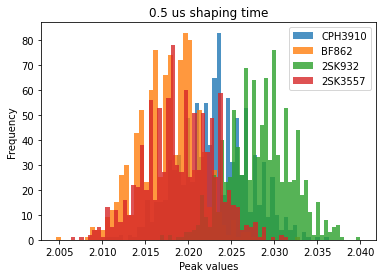

0.004065, 0.003489, 0.003640, 0.004045


In [63]:
print(len(max_array))
#0.5 shaping time
low_array = max_array
plt.hist(low_array[0:1001], alpha=0.8, label="CPH3910", bins=50)
plt.hist(low_array[1001:2001], alpha=0.8, label="BF862", bins=50)
plt.hist(low_array[2001:3001], alpha=0.8, label="2SK932", bins=50)
plt.hist(low_array[3001:4001], alpha=0.8, label="2SK3557", bins=50)
plt.title("0.5 us shaping time")
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Peak values")
plt.show()

print("%f, %f, %f, %f" % (stdev(low_array[0:1001], avg(low_array[0:1001])), stdev(low_array[1001:2001], avg(low_array[1001:2001])), stdev(low_array[2001:3001], avg(low_array[2001:3001])), stdev(low_array[3001:4001], avg(low_array[3001:4001]))))

In [6]:
# Conversion from V to energy (from JC's code)

V_in = 0.012 # need to check this
E_Ar = 25
C_in = 4e-12

trans = (E_Ar/(1.6e-19))*C_in*(V_in/1000) # v to E
V_T = trans/max(max_array)
FWHM = RMS(max_array, avg(max_array)) * 2.35 * V_T
print("%f keV" % (FWHM))

2.038655 keV


4000


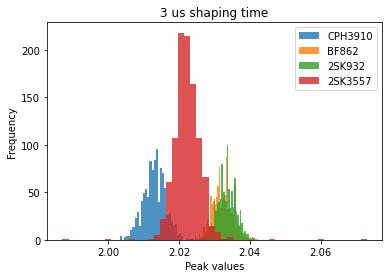

0.003220, 0.002934, 0.002765, 0.004159


In [23]:
print(len(max_array))
mid_array = max_array
plt.hist(mid_array[0:1001], alpha=0.8, label="CPH3910", bins=50)
plt.hist(mid_array[1001:2001], alpha=0.8, label="BF862", bins=50)
plt.hist(mid_array[2001:3001], alpha=0.8, label="2SK932", bins=50)
plt.hist(mid_array[3001:4001], alpha=0.8, label="2SK3557", bins=50)
plt.title("3 us shaping time")
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Peak values")
plt.show()
print("%f, %f, %f, %f" % (stdev(mid_array[0:1001], avg(mid_array[0:1001])), stdev(mid_array[1001:2001], avg(mid_array[1001:2001])), stdev(mid_array[2001:3001], avg(mid_array[2001:3001])), stdev(mid_array[3001:4001], avg(mid_array[3001:4001]))))

main analysis here

In [28]:
ten_us = np.loadtxt("/content/drive/My Drive/10 us.txt")
six_us = np.loadtxt("/content/drive/My Drive/6 us.txt")
three_us = np.loadtxt("/content/drive/My Drive/3 us.txt")
two_us = np.loadtxt("/content/drive/My Drive/2 us.txt")
one_us = np.loadtxt("/content/drive/My Drive/1 us.txt")
point_five_us = np.loadtxt("/content/drive/My Drive/0.5 us.txt")

In [37]:
def VtoE(array):
  """Takes V values and turns it into E values"""
  for val in array:
    val = val*3.75
  return array



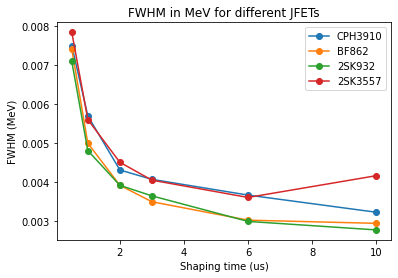

In [46]:
# 2V -> 7.5 MeV
# 1V -> 7.5/2 MeV -> 3.75 MeV
#CPH3910
array1 = np.array([point_five_us[0:1001], one_us[0:1001], two_us[0:1001], three_us[0:1001], six_us[0:1001], ten_us[0:1001]])
#bf862
array2 = np.array([point_five_us[1001:2001], one_us[1001:2001], two_us[1001:2001], three_us[1001:2001], six_us[1001:2001], ten_us[1001:2001]])
# 2sk932
array3 = np.array([point_five_us[2001:3001], one_us[2001:3001], two_us[2001:3001], three_us[2001:3001], six_us[2001:3001], ten_us[2001:3001]])
#2sk3557
array4 = np.array([point_five_us[3001:4001], one_us[3001:4001], two_us[3001:4001], three_us[3001:4001], six_us[3001:4001], ten_us[3001:4001]])

E1 = VtoE(array1)
E2 = VtoE(array2)
E3 = VtoE(array3)
E4 = VtoE(array4)

std1 = np.array([stdev(E1[0], avg(E1[0])), stdev(E1[1], avg(E1[1])), stdev(E1[2], avg(E1[2])), stdev(E1[3], avg(E1[3])), stdev(E1[4], avg(E1[4])), stdev(E1[5], avg(E1[5]))])
std2 = np.array([stdev(E2[0], avg(E2[0])), stdev(E2[1], avg(E2[1])), stdev(E2[2], avg(E2[2])), stdev(E2[3], avg(E2[3])), stdev(E2[4], avg(E2[4])), stdev(E2[5], avg(E2[5]))])
std3 = np.array([stdev(E3[0], avg(E3[0])), stdev(E3[1], avg(E3[1])), stdev(E3[2], avg(E3[2])), stdev(E3[3], avg(E3[3])), stdev(E3[4], avg(E3[4])), stdev(E3[5], avg(E3[5]))])
std4 = np.array([stdev(E4[0], avg(E4[0])), stdev(E4[1], avg(E4[1])), stdev(E4[2], avg(E4[2])), stdev(E4[3], avg(E4[3])), stdev(E4[4], avg(E4[4])), stdev(E4[5], avg(E4[5]))])

time = [0.5, 1, 2, 3, 6, 10]
plt.plot(time, std1, marker="o", label="CPH3910")
plt.plot(time, std2, marker="o", label="BF862")
plt.plot(time, std3, marker="o", label="2SK932")
plt.plot(time, std4, marker="o", label="2SK3557")
plt.legend()
plt.xlabel("Shaping time (us)")
plt.ylabel("FWHM (MeV)")
plt.title("FWHM in MeV for different JFETs")
plt.show()

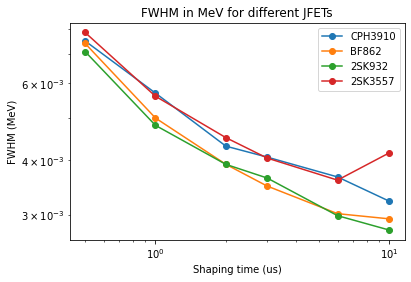

In [47]:
time = [0.5, 1, 2, 3, 6, 10]
plt.plot(time, std1, marker="o", label="CPH3910")
plt.plot(time, std2, marker="o", label="BF862")
plt.plot(time, std3, marker="o", label="2SK932")
plt.plot(time, std4, marker="o", label="2SK3557")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlabel("Shaping time (us)")
plt.ylabel("FWHM (MeV)")
plt.title("FWHM in MeV for different JFETs")
plt.show()

Text(0.5, 1.0, 'FWHM of several JFETs with shaping time')

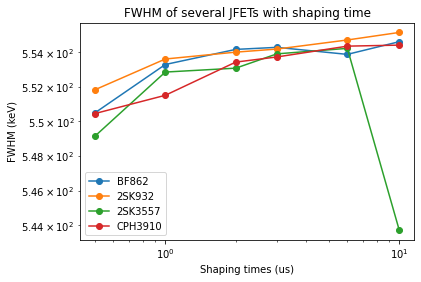

In [ ]:
#[10, 6, 3, 2, 1, 0.5]
BF862 = [554.62, 553.88, 554.29, 554.17, 553.29, 550.48]
#2SK932
SK932 = [555.16, 554.72, 554.19, 554.01, 553.61, 551.82]
#2SK3557
SK3557 = [543.73, 554.23, 553.91, 553.077, 552.85, 549.13]
#CPH3910
CPH3910 = [554.42, 554.36, 553.73, 553.43, 551.50, 550.44]
times = [10, 6, 3, 2, 1, 0.5]
plt.plot(times, BF862, label="BF862", marker = "o")
plt.plot(times, SK932, label="2SK932", marker = "o")
plt.plot(times, SK3557, label="2SK3557", marker = "o")
plt.plot(times, CPH3910, label="CPH3910", marker = "o")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Shaping times (us)")
plt.ylabel("FWHM (keV)")
plt.title("FWHM of several JFETs with shaping time")